## 필수

1. 교통사고 데이터에서 경기도 제외시키기 
2. 년도 줄이기 (2019? 2018-2019?)
3. 강우량 데이터에서 현충원 -> 동작구, 북악산 -> 종로구로 바꾸기
4. 교통사고, 강우량 데이터 합쳐서 구별, 일별로 강수량, 교통사고수, 사망자수 묶기 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm_notebook

# 경고표시 지우기
import warnings
warnings.filterwarnings(action="ignore")

# matplotlib는 한글 폰트가 지원이 안됨. 지원되게하려면.
import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname = "C:/Windows/Fonts/malgun.ttf").get_name() # 맑은고딕폰트이름

# 폰트를 지정해주는 작업
plt.rc("font", family = font_name)

# 한글 폰트때문에 깨져보이는 -를 다시 보일 수 있게 해주는 작업
import matplotlib as mpl
mpl.rcParams["axes.unicode_minus"] = False

import urllib.request as req
from urllib.request import urlopen
from urllib.error import HTTPError, URLError
import urllib.parse
from bs4 import BeautifulSoup
import requests

In [3]:
# ?pd.read_excel

traffic_data = pd.read_excel("./data/traffic_data.xlsx", usecols="A,B,C,D,E,F,G,H")

traffic_data.head()

KeyboardInterrupt: 

In [9]:
traffic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550791 entries, 0 to 550790
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   발생일      550791 non-null  int64 
 1   발생시간     550791 non-null  object
 2   사망자수     550791 non-null  int64 
 3   중상자수     550791 non-null  int64 
 4   경상자수     550791 non-null  int64 
 5   부상신고자수   550791 non-null  int64 
 6   발생지_시도   550791 non-null  object
 7   발생지_시군구  550791 non-null  object
dtypes: int64(5), object(3)
memory usage: 33.6+ MB


In [14]:
traffic_data["date2"] = pd.to_datetime(traffic_data["발생일"], format="%Y%m%d")

In [15]:
traffic_data.head()

,발생일,발생시간,사망자수,중상자수,경상자수,부상신고자수,발생지_시도,발생지_시군구,date2
0,20140101,00시,0,0,1,0,서울,종로구,2014-01-01
1,20140101,00시,0,0,1,0,서울,강북구,2014-01-01
2,20140101,00시,0,1,0,0,서울,강동구,2014-01-01
3,20140101,00시,0,0,2,0,서울,구로구,2014-01-01
4,20140101,00시,0,0,0,2,서울,구로구,2014-01-01


In [602]:
traffic_data2 = traffic_data.copy()

traffic_data2

,발생일,발생시간,사망자수,중상자수,경상자수,부상신고자수,발생지_시도,발생지_시군구,date2
0,20140101,00시,0,0,1,0,서울,종로구,2014-01-01
1,20140101,00시,0,0,1,0,서울,강북구,2014-01-01
2,20140101,00시,0,1,0,0,서울,강동구,2014-01-01
3,20140101,00시,0,0,2,0,서울,구로구,2014-01-01
4,20140101,00시,0,0,0,2,서울,구로구,2014-01-01
...,...,...,...,...,...,...,...,...,...
550786,20191231,23시,0,0,0,2,서울,강남구,2019-12-31
550787,20191231,23시,0,0,1,0,서울,강남구,2019-12-31
550788,20191231,23시,0,1,0,0,경기,평택시,2019-12-31
550789,20191231,23시,0,0,1,0,경기,과천시,2019-12-31


In [603]:
del traffic_data2["발생일"]

In [606]:
traffic_data2

,발생시간,사망자수,중상자수,경상자수,부상신고자수,발생지_시도,발생지_시군구,date2
0,00시,0,0,1,0,서울,종로구,2014-01-01
1,00시,0,0,1,0,서울,강북구,2014-01-01
2,00시,0,1,0,0,서울,강동구,2014-01-01
3,00시,0,0,2,0,서울,구로구,2014-01-01
4,00시,0,0,0,2,서울,구로구,2014-01-01
...,...,...,...,...,...,...,...,...
550786,23시,0,0,0,2,서울,강남구,2019-12-31
550787,23시,0,0,1,0,서울,강남구,2019-12-31
550788,23시,0,1,0,0,경기,평택시,2019-12-31
550789,23시,0,0,1,0,경기,과천시,2019-12-31


In [607]:
traffic_data2.head()

,발생시간,사망자수,중상자수,경상자수,부상신고자수,발생지_시도,발생지_시군구,date2
0,00시,0,0,1,0,서울,종로구,2014-01-01
1,00시,0,0,1,0,서울,강북구,2014-01-01
2,00시,0,1,0,0,서울,강동구,2014-01-01
3,00시,0,0,2,0,서울,구로구,2014-01-01
4,00시,0,0,0,2,서울,구로구,2014-01-01


In [608]:
traffic_pre_data = traffic_data2.query('"2018-01-01"<= date2 <= "2019-12-31"')

In [609]:
traffic_pre_data

,발생시간,사망자수,중상자수,경상자수,부상신고자수,발생지_시도,발생지_시군구,date2
363827,00시,0,0,2,0,서울,용산구,2018-01-01
363828,00시,0,1,1,0,서울,강동구,2018-01-01
363829,00시,0,0,1,0,서울,송파구,2018-01-01
363830,00시,0,1,0,0,서울,성북구,2018-01-01
363831,00시,0,1,3,0,경기,안양시,2018-01-01
...,...,...,...,...,...,...,...,...
550786,23시,0,0,0,2,서울,강남구,2019-12-31
550787,23시,0,0,1,0,서울,강남구,2019-12-31
550788,23시,0,1,0,0,경기,평택시,2019-12-31
550789,23시,0,0,1,0,경기,과천시,2019-12-31


In [610]:
traffic_pre_data_ = traffic_pre_data.set_index("date2")

In [611]:
traffic_pre_data_

,발생시간,사망자수,중상자수,경상자수,부상신고자수,발생지_시도,발생지_시군구
date2,,,,,,,
2018-01-01,00시,0,0,2,0,서울,용산구
2018-01-01,00시,0,1,1,0,서울,강동구
2018-01-01,00시,0,0,1,0,서울,송파구
2018-01-01,00시,0,1,0,0,서울,성북구
2018-01-01,00시,0,1,3,0,경기,안양시
...,...,...,...,...,...,...,...
2019-12-31,23시,0,0,0,2,서울,강남구
2019-12-31,23시,0,0,1,0,서울,강남구
2019-12-31,23시,0,1,0,0,경기,평택시


In [612]:
tr_data = traffic_pre_data_[traffic_pre_data_["발생지_시도"] != "경기"]

tr_data

,발생시간,사망자수,중상자수,경상자수,부상신고자수,발생지_시도,발생지_시군구
date2,,,,,,,
2018-01-01,00시,0,0,2,0,서울,용산구
2018-01-01,00시,0,1,1,0,서울,강동구
2018-01-01,00시,0,0,1,0,서울,송파구
2018-01-01,00시,0,1,0,0,서울,성북구
2018-01-01,01시,0,0,1,0,서울,강북구
...,...,...,...,...,...,...,...
2019-12-31,22시,0,0,0,1,서울,중랑구
2019-12-31,22시,0,0,1,0,서울,강남구
2019-12-31,22시,0,0,1,0,서울,송파구


In [40]:
tr_data.to_csv("./data/pre_tr_data.csv")

In [613]:
df = pd.read_csv("./data/pre_tr_data.csv")

In [614]:
df

,date2,발생시간,사망자수,중상자수,경상자수,부상신고자수,발생지_시도,발생지_시군구
0,2018-01-01,00시,0,0,2,0,서울,용산구
1,2018-01-01,00시,0,1,1,0,서울,강동구
2,2018-01-01,00시,0,0,1,0,서울,송파구
3,2018-01-01,00시,0,1,0,0,서울,성북구
4,2018-01-01,01시,0,0,1,0,서울,강북구
...,...,...,...,...,...,...,...,...
78048,2019-12-31,22시,0,0,0,1,서울,중랑구
78049,2019-12-31,22시,0,0,1,0,서울,강남구
78050,2019-12-31,22시,0,0,1,0,서울,송파구
78051,2019-12-31,23시,0,0,0,2,서울,강남구


## 강우량 데이터

In [44]:
?pd.read_csv

In [342]:
rainfall_2018 = pd.read_csv("./data/rainfall_data/2018년 서울 일별 강우량 데이터_.csv", encoding="utf-8")

In [343]:
# 강우량 데이터에서 현충원 -> 동작구, 북악산 -> 종로구로 바꾸기
# 교통사고, 강우량 데이터 합쳐서 구별, 일별로 강수량, 교통사고수, 사망자수 묶기
rainfall_2018

,\t지점번호,지점명,일시,강수량(mm),1시간최다강수량(mm),1시간최다강수량시각,Unnamed: 6
0,400,강남,2018-01-01,0.0,0.0,00:01,NaN
1,400,강남,2018-01-02,0.0,0.0,00:01,NaN
2,400,강남,2018-01-03,0.0,0.0,00:01,NaN
3,400,강남,2018-01-04,0.0,0.0,00:01,NaN
4,400,강남,2018-01-05,0.0,0.0,00:01,NaN
...,...,...,...,...,...,...,...
10181,889,현충원,2018-12-27,0.0,0.0,00:01,NaN
10182,889,현충원,2018-12-28,0.0,0.0,00:01,NaN
10183,889,현충원,2018-12-29,0.0,0.0,00:01,NaN
10184,889,현충원,2018-12-30,0.0,0.0,00:01,NaN


In [345]:
rainfall_2018.isna().sum()

\t지점번호              0
지점명               365
일시                  0
강수량(mm)             5
1시간최다강수량(mm)        3
1시간최다강수량시각          0
Unnamed: 6      10186
dtype: int64

In [344]:
rainfall_2018["지점명"] = rainfall_2018["지점명"].map({"강남":"강남구","강동":"강동구","강북":"강북구","관악":"관악구","강서":"강서구","광진":"광진구",
                                                  "구로":"구로구","금천":"금천구","기상청":"동작구","남현":"관악구","노원":"노원구","도봉":"도봉구",
                                                  "동대문":"동대문구","마포":"마포구","북악산":"종로구","북한산":"북한산","서대문":"서대문구",
                                                  "서초":"서초구","성동":"성동구","성북":"성북구","송파":"송파구","양천":"양천구","영등포":"영등포구",
                                                  "용산":"용산구","은평":"은평구","중구":"중구","중랑":"중랑구","한강":"영등포구","현충원":"동작구"
})

In [346]:
rainfall_2018

,\t지점번호,지점명,일시,강수량(mm),1시간최다강수량(mm),1시간최다강수량시각,Unnamed: 6
0,400,강남구,2018-01-01,0.0,0.0,00:01,NaN
1,400,강남구,2018-01-02,0.0,0.0,00:01,NaN
2,400,강남구,2018-01-03,0.0,0.0,00:01,NaN
3,400,강남구,2018-01-04,0.0,0.0,00:01,NaN
4,400,강남구,2018-01-05,0.0,0.0,00:01,NaN
...,...,...,...,...,...,...,...
10181,889,동작구,2018-12-27,0.0,0.0,00:01,NaN
10182,889,동작구,2018-12-28,0.0,0.0,00:01,NaN
10183,889,동작구,2018-12-29,0.0,0.0,00:01,NaN
10184,889,동작구,2018-12-30,0.0,0.0,00:01,NaN


In [347]:
del rainfall_2018["Unnamed: 6"]

In [109]:
del rainfall_2018["지점명_"]

KeyError: '지점명_'

In [348]:
rainfall_2018

,\t지점번호,지점명,일시,강수량(mm),1시간최다강수량(mm),1시간최다강수량시각
0,400,강남구,2018-01-01,0.0,0.0,00:01
1,400,강남구,2018-01-02,0.0,0.0,00:01
2,400,강남구,2018-01-03,0.0,0.0,00:01
3,400,강남구,2018-01-04,0.0,0.0,00:01
4,400,강남구,2018-01-05,0.0,0.0,00:01
...,...,...,...,...,...,...
10181,889,동작구,2018-12-27,0.0,0.0,00:01
10182,889,동작구,2018-12-28,0.0,0.0,00:01
10183,889,동작구,2018-12-29,0.0,0.0,00:01
10184,889,동작구,2018-12-30,0.0,0.0,00:01


In [349]:
del rainfall_2018["\t지점번호"]

In [350]:
rainfall_2018

,지점명,일시,강수량(mm),1시간최다강수량(mm),1시간최다강수량시각
0,강남구,2018-01-01,0.0,0.0,00:01
1,강남구,2018-01-02,0.0,0.0,00:01
2,강남구,2018-01-03,0.0,0.0,00:01
3,강남구,2018-01-04,0.0,0.0,00:01
4,강남구,2018-01-05,0.0,0.0,00:01
...,...,...,...,...,...
10181,동작구,2018-12-27,0.0,0.0,00:01
10182,동작구,2018-12-28,0.0,0.0,00:01
10183,동작구,2018-12-29,0.0,0.0,00:01
10184,동작구,2018-12-30,0.0,0.0,00:01


,date2,발생시간,사망자수,중상자수,경상자수,부상신고자수,발생지_시도,발생지_시군구,지점명,일시,강수량(mm),1시간최다강수량(mm),1시간최다강수량시각
0,2018-01-01,00시,0.0,0.0,2.0,0.0,서울,용산구,NaN,NaN,NaN,NaN,NaN
1,2018-01-01,00시,0.0,1.0,1.0,0.0,서울,강동구,NaN,NaN,NaN,NaN,NaN
2,2018-01-01,00시,0.0,0.0,1.0,0.0,서울,송파구,NaN,NaN,NaN,NaN,NaN
3,2018-01-01,00시,0.0,1.0,0.0,0.0,서울,성북구,NaN,NaN,NaN,NaN,NaN
4,2018-01-01,01시,0.0,0.0,1.0,0.0,서울,강북구,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,동작구,2018-12-27,0.0,0.0,00:01
10182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,동작구,2018-12-28,0.0,0.0,00:01
10183,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,동작구,2018-12-29,0.0,0.0,00:01
10184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,동작구,2018-12-30,0.0,0.0,00:01


In [250]:
df["발생지_시군구"].value_counts() # 25개

df.rename(columns={'발생지_시군구':'지점명'}, inplace=True)
# 영등포구

df.head()

KeyError: '발생지_시군구'

In [351]:
rainfall_2018["지점명"].value_counts() # 27개
# 남현 <- 관악구에 위치, 기상청 <- 동작구에 위치, 한강 <- 서울특별시 영등포구 여의도동 지점

동작구     730
관악구     730
노원구     365
강서구     365
양천구     365
강북구     365
성동구     365
은평구     365
구로구     365
서초구     365
성북구     365
강동구     365
동대문구    365
광진구     365
도봉구     365
서대문구    365
금천구     365
중랑구     365
마포구     365
중구      365
송파구     365
용산구     364
강남구     364
영등포구    362
종로구     336
Name: 지점명, dtype: int64

In [252]:
#df = df.groupby("지점명")
df = df.sum()

In [253]:
df

일시        2018-01-012018-01-012018-01-012018-01-012018-0...
발생시간      00시00시00시00시01시01시01시01시02시02시02시02시02시02시02시0...
사망자수                                                    554
중상자수                                                  21997
경상자수                                                  76262
부상신고자수                                                 9396
발생지_시도    서울서울서울서울서울서울서울서울서울서울서울서울서울서울서울서울서울서울서울서울서울서울서울...
지점명       용산구강동구송파구성북구강북구광진구강남구송파구종로구마포구영등포구영등포구관악구관악구강서...
피해자                                                  108209
dtype: object

In [352]:
rainfall_2018.groupby("지점명").sum()

,강수량(mm),1시간최다강수량(mm)
지점명,,
강남구,1312.5,503.0
강동구,1183.0,475.0
강북구,1391.5,535.5
강서구,1163.5,524.5
관악구,2652.5,918.0
광진구,1124.5,421.0
구로구,1174.0,461.5
금천구,1154.0,421.0
노원구,1409.0,573.0


In [353]:
rainfall_2018_ = rainfall_2018.pivot_table(values="강수량(mm)", index=["일시","지점명"])

In [360]:
rainfall_2018_["강수량(mm)"].value_counts().sum()

9086

In [256]:
df["피해자"] = df["사망자수"]+df["중상자수"]+df["경상자수"]+df["부상신고자수"]

In [257]:
df

일시        2018-01-012018-01-012018-01-012018-01-012018-0...
발생시간      00시00시00시00시01시01시01시01시02시02시02시02시02시02시02시0...
사망자수                                                    554
중상자수                                                  21997
경상자수                                                  76262
부상신고자수                                                 9396
발생지_시도    서울서울서울서울서울서울서울서울서울서울서울서울서울서울서울서울서울서울서울서울서울서울서울...
지점명       용산구강동구송파구성북구강북구광진구강남구송파구종로구마포구영등포구영등포구관악구관악구강서...
피해자                                                  108209
dtype: object

In [338]:
rainfall_2019 = pd.read_csv("./data/rainfall_data/2019년 서울 일별 강우량 데이터_.csv", encoding="utf-8")

In [339]:
rainfall_2019.isna().sum()

\t지점번호             0
지점명                0
일시                 0
강수량(mm)           17
1시간최다강수량(mm)      15
1시간최다강수량시각         1
Unnamed: 6      9845
dtype: int64

In [340]:
rainfall_2019["지점명"] = rainfall_2019["지점명"].map({"강남":"강남구","강동":"강동구","강북":"강북구","관악":"관악구","강서":"강서구","광진":"광진구",
                                                  "구로":"구로구","금천":"금천구","기상청":"동작구","남현":"관악구","노원":"노원구","도봉":"도봉구",
                                                  "동대문":"동대문구","마포":"마포구","북악산":"종로구","북한산":"북한산","서대문":"서대문구",
                                                  "서초":"서초구","성동":"성동구","성북":"성북구","송파":"송파구","양천":"양천구","영등포":"영등포구",
                                                  "용산":"용산구","은평":"은평구","중구":"중구","중랑":"중랑구","한강":"영등포구","현충원":"동작구"
})

In [341]:
rainfall_2019.isna().sum()

\t지점번호             0
지점명              365
일시                 0
강수량(mm)           17
1시간최다강수량(mm)      15
1시간최다강수량시각         1
Unnamed: 6      9845
dtype: int64

In [ ]:
rainfall_2019.fillna(0, inplace=True)
del rainfall_2019["Unnamed: 6"]
del rainfall_2019["\t지점번호"]

In [330]:
rainfall_2019.head(20)

,지점명,일시,강수량(mm),1시간최다강수량(mm),1시간최다강수량시각
0,강남구,2019-01-01,0.0,0.0,00:01
1,강남구,2019-01-02,0.0,0.0,00:01
2,강남구,2019-01-03,0.0,0.0,00:01
3,강남구,2019-01-04,0.0,0.0,00:01
4,강남구,2019-01-05,0.0,0.0,00:01
5,강남구,2019-01-06,0.0,0.0,00:01
6,강남구,2019-01-07,0.0,0.0,00:01
7,강남구,2019-01-08,0.0,0.0,00:01
8,강남구,2019-01-09,0.0,0.0,00:01
9,강남구,2019-01-10,0.0,0.0,00:01


In [332]:
rainfall_2019_ = rainfall_2019.pivot_table(values="강수량(mm)", index=["일시","지점명"])
rainfall_2019_

강수량(mm)
일시         지점명          
2019-01-01 0         0.0
           강남구       0.0
           강동구       0.0
           강북구       0.0
           강서구       0.0
...                  ...
2019-12-31 영등포구      0.0
           용산구       0.0
           은평구       0.0
           중구        0.0
           중랑구       0.0

[9115 rows x 1 columns]

In [317]:
pd.concat([rainfall_2018_, rainfall_2019_]).to_csv("./data/18_19강우량데이터.csv", encoding="utf-8")

In [318]:
df2 = pd.read_csv("./data/18_19강우량데이터.csv", encoding="utf-8")

In [321]:
df2["지점명"].value_counts()

광진구     730
은평구     730
강북구     730
구로구     730
서초구     730
마포구     730
동대문구    730
동작구     730
양천구     730
송파구     730
성동구     730
성북구     730
강동구     730
강서구     730
노원구     730
관악구     730
도봉구     730
서대문구    730
강남구     729
중구      729
금천구     728
영등포구    727
용산구     726
중랑구     726
0       365
종로구     336
Name: 지점명, dtype: int64

In [300]:
df["피해자"] = df["사망자수"]+df["중상자수"]+df["경상자수"]+df["부상신고자수"]

In [301]:
df.rename(columns = {"date2":"일시"}, inplace=True)
df[df["일시"] == "2018-01-01"].sort_values("지점명")

TypeError: rename() got an unexpected keyword argument 'columns'

In [302]:
df_ = df.groupby(["일시", "지점명"])["피해자","사망자수"].sum()
df_

TypeError: 'str' object is not callable

In [303]:
dataframe = pd.merge(df2, df_, on=["일시","지점명"])

In [304]:
dataframe

,일시,지점명,강수량(mm),피해자,사망자수
0,2018-01-01,강남구,0.0,5,0
1,2018-01-01,강동구,0.0,3,0
2,2018-01-01,강북구,0.0,5,0
3,2018-01-01,강서구,0.0,1,0
4,2018-01-01,관악구,0.0,9,0
...,...,...,...,...,...
17191,2019-12-31,영등포구,0.0,5,0
17192,2019-12-31,용산구,0.0,3,0
17193,2019-12-31,은평구,0.0,5,0
17194,2019-12-31,중구,0.0,3,0


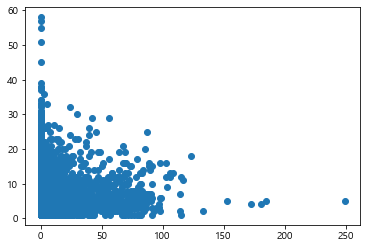

In [232]:
plt.scatter(dataframe["강수량(mm)"], dataframe["피해자"])

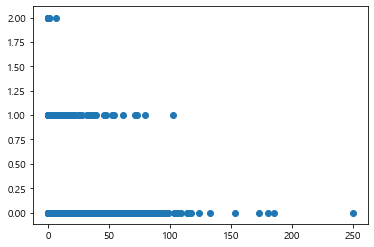

In [233]:
plt.scatter(dataframe["강수량(mm)"], dataframe["사망자수"])

In [234]:
dataframe.to_csv("./data/prepro_result.csv")

In [235]:
dataframe.groupby("지점명").sum()

,강수량(mm),피해자,사망자수
지점명,,,
강남구,2294.00,10042,34
강동구,2212.00,3855,23
강북구,2289.50,3359,20
강서구,2042.50,4730,31
관악구,2374.75,3490,18
광진구,2155.50,2794,13
구로구,2084.50,4251,26
금천구,2010.50,2689,15
노원구,2396.00,4551,22


In [236]:
traffic_data2.isna().sum()

발생시간       0
사망자수       0
중상자수       0
경상자수       0
부상신고자수     0
발생지_시도     0
발생지_시군구    0
date2      0
dtype: int64

In [277]:
rainfall_2018.fillna(0, inplace=True)

In [278]:
rainfall_2018.isna().sum()

\t지점번호          0
지점명             0
일시              0
강수량(mm)         0
1시간최다강수량(mm)    0
1시간최다강수량시각      0
Unnamed: 6      0
dtype: int64

---
## 2021 11 16

In [381]:
rainfall_2018 = pd.read_csv("./data/rainfall_data/2018년 서울 일별 강우량 데이터_.csv", encoding="utf-8")

In [394]:
rainfall_2018

,\t지점번호,지점명,일시,강수량(mm),1시간최다강수량(mm),1시간최다강수량시각,Unnamed: 6
0,400,강남,2018-01-01,0.0,0.0,00:01,NaN
1,400,강남,2018-01-02,0.0,0.0,00:01,NaN
2,400,강남,2018-01-03,0.0,0.0,00:01,NaN
3,400,강남,2018-01-04,0.0,0.0,00:01,NaN
4,400,강남,2018-01-05,0.0,0.0,00:01,NaN
...,...,...,...,...,...,...,...
10181,889,현충원,2018-12-27,0.0,0.0,00:01,NaN
10182,889,현충원,2018-12-28,0.0,0.0,00:01,NaN
10183,889,현충원,2018-12-29,0.0,0.0,00:01,NaN
10184,889,현충원,2018-12-30,0.0,0.0,00:01,NaN


In [391]:
rainfall_2018["일시"] = pd.to_datetime(rainfall_2018["일시"], format="%Y%m%d")

In [364]:
del rainfall_2018["Unnamed: 6"]
del rainfall_2018["\t지점번호"]

In [379]:
tmp = np.unique(rainfall_2018["지점명"].values)
tmp

array(['강남', '강동', '강북', '강서', '관악', '광진', '구로', '금천', '기상청', '남현', '노원',
       '도봉', '동대문', '마포', '북악산', '서대문', '서초', '성동', '성북', '송파', '양천',
       '영등포 ', '용산', '은평', '중구', '중랑', '한강', '현충원'], dtype=object)

In [392]:
rainfall_2018["일시"].value_counts()

2018-05-21    28
2018-04-19    28
2018-10-07    28
2018-05-02    28
2018-08-11    28
              ..
2018-12-06    27
2018-12-14    27
2018-12-13    27
2018-12-20    27
2018-12-30    26
Name: 일시, Length: 365, dtype: int64

In [437]:
# rainfall_2018.set_index("일시", inplace=True)
rainfall_2018.index = pd.DatetimeIndex(rainfall_2018.index)

In [446]:
for data in tmp:
    rainfall_2018[rainfall_2018["지점명"]==data] = rainfall_2018[rainfall_2018["지점명"]==data].reindex(pd.date_range("2018-01-01", "2018-12-31"), fill_value="0")
    print(len(rainfall_2018[rainfall_2018["지점명"]==data]))

364
365
365
365
365
365
365
365
365
365
365
365
365
365
336
365
365
365
365
365
365
365
364
365
365
365
362
365


In [423]:
df_tmp = []

for i in tmp:
    df_tmp.append(rainfall_2018[rainfall_2018["지점명"]==i])

In [478]:
##### 일시 결측치 채움

redate_tmp = []

for data in df_tmp:
    #data["지점명"].resample("D").first().fillna(data["지점명"][0])
    #print(len(data))
    data.index = pd.DatetimeIndex(data.index)
    df = data.reindex(pd.date_range("2018-01-01", "2018-12-31"), fill_value=data["지점명"][0])
    redate_tmp.append(df)

rainfall_redate_df = pd.DataFrame()
    
for redate_data in redate_tmp:
    rainfall_redate_df = pd.concat([rainfall_redate_df, redate_data])


In [479]:
rainfall_redate_df["지점명"].value_counts()

광진      365
강동      365
구로      365
강남      365
마포      365
송파      365
성북      365
은평      365
중랑      365
동대문     365
강북      365
남현      365
노원      365
금천      365
한강      365
현충원     365
용산      365
영등포     365
도봉      365
기상청     365
서초      365
강서      365
중구      365
서대문     365
양천      365
북악산     365
성동      365
관악      365
Name: 지점명, dtype: int64

In [480]:
rainfall_redate_df.isna().sum()

\t지점번호              0
지점명                 0
강수량(mm)             5
1시간최다강수량(mm)        3
1시간최다강수량시각          0
Unnamed: 6      10186
dtype: int64

In [463]:
rainfall_redate_df["지점명"] = rainfall_redate_df["지점명"].map({"강남":"강남구","강동":"강동구","강북":"강북구","관악":"관악구","강서":"강서구","광진":"광진구",
                                                  "구로":"구로구","금천":"금천구","기상청":"동작구","남현":"관악구","노원":"노원구","도봉":"도봉구",
                                                  "동대문":"동대문구","마포":"마포구","북악산":"종로구","북한산":"북한산","서대문":"서대문구",
                                                  "서초":"서초구","성동":"성동구","성북":"성북구","송파":"송파구","양천":"양천구","영등포":"영등포구",
                                                  "용산":"용산구","은평":"은평구","중구":"중구","중랑":"중랑구","한강":"영등포구","현충원":"동작구"
})

In [487]:
rainfall_redate_df["지점명"].value_counts()

광진      365
강동      365
구로      365
강남      365
마포      365
송파      365
성북      365
은평      365
중랑      365
동대문     365
강북      365
남현      365
노원      365
금천      365
한강      365
현충원     365
용산      365
영등포     365
도봉      365
기상청     365
서초      365
강서      365
중구      365
서대문     365
양천      365
북악산     365
성동      365
관악      365
Name: 지점명, dtype: int64

In [466]:
rainfall_redate_df.columns

Index(['\t지점번호', '지점명', '강수량(mm)', '1시간최다강수량(mm)', '1시간최다강수량시각', 'Unnamed: 6'], dtype='object')

In [482]:
del rainfall_redate_df["Unnamed: 6"]
del rainfall_redate_df["\t지점번호"]

In [483]:
del rainfall_redate_df["1시간최다강수량시각"]

In [488]:
rainfall_redate_df

,지점명,강수량(mm),1시간최다강수량(mm)
2018-01-01,강남,0,0
2018-01-02,강남,0,0
2018-01-03,강남,0,0
2018-01-04,강남,0,0
2018-01-05,강남,0,0
...,...,...,...
2018-12-27,현충원,0,0
2018-12-28,현충원,0,0
2018-12-29,현충원,0,0
2018-12-30,현충원,0,0


In [489]:
rainfall_redate_df["강수량(mm)"].values

array([0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0], dtype=object)

In [491]:
tmp = rainfall_redate_df["지점명"].values

for i in rainfall_redate_df["강수량(mm)"].values:
    if i in tmp:
        print(i)

강남
북악산
북악산
북악산
북악산
북악산
북악산
북악산
북악산
북악산
북악산
북악산
북악산
북악산
북악산
북악산
북악산
북악산
북악산
북악산
북악산
북악산
북악산
북악산
북악산
북악산
북악산
북악산
북악산
북악산
용산
한강
한강
한강


In [475]:
rainfall_redate_df["강수량(mm)"].isna().sum()

5

In [492]:
# 수작업으로 이상치 고쳤음.
rainfall_redate_df.to_csv("./data/tmp.csv")

In [522]:
df = pd.read_csv("./data/tmp.csv", encoding="euckr")

In [523]:
df.fillna(0, inplace=True)

In [524]:
df.rename(columns={"Unnamed: 0" : "일시"}, inplace=True)
df.set_index("일시")

,지점명,강수량(mm),1시간최다강수량(mm)
일시,,,
2018-01-01,강남,0.0,0.0
2018-01-02,강남,0.0,0.0
2018-01-03,강남,0.0,0.0
2018-01-04,강남,0.0,0.0
2018-01-05,강남,0.0,0.0
...,...,...,...
2018-12-27,현충원,0.0,0.0
2018-12-28,현충원,0.0,0.0
2018-12-29,현충원,0.0,0.0


In [525]:
df.groupby("지점명").sum()

,강수량(mm),1시간최다강수량(mm)
지점명,,
강남,1312.5,503.0
강동,1183.0,475.0
강북,1391.5,535.5
강서,1163.5,524.5
관악,1252.0,442.5
광진,1124.5,421.0
구로,1174.0,461.5
금천,1154.0,421.0
기상청,1149.5,458.5


In [532]:
mapping = {"강남":"강남구",
           "강동":"강동구",
           "강북":"강북구",
           "관악":"관악구",
           "강서":"강서구",
           "광진":"광진구",
           "구로":"구로구",
           "금천":"금천구",
           "기상청":"동작구",
           "남현":"관악구",
           "노원":"노원구",
           "도봉":"도봉구",
           "동대문":"동대문구",
           "마포":"마포구",
           "북악산":"종로구",
           "서대문":"서대문구",
           "서초":"서초구",
           "성동":"성동구",
           "성북":"성북구",
           "송파":"송파구",
           "양천":"양천구",
           "영등포 ":"영등포구",
           "용산":"용산구",
           "은평":"은평구",
           "중구":"중구",
           "중랑":"중랑구",
           "한강":"영등포구",
           "현충원":"동작구"
}

df["지점명"] = df["지점명"].map(mapping)

In [533]:
df.isna().sum()

일시              0
지점명             0
강수량(mm)         0
1시간최다강수량(mm)    0
dtype: int64

In [534]:
df

,일시,지점명,강수량(mm),1시간최다강수량(mm)
0,2018-01-01,강남구,0.0,0.0
1,2018-01-02,강남구,0.0,0.0
2,2018-01-03,강남구,0.0,0.0
3,2018-01-04,강남구,0.0,0.0
4,2018-01-05,강남구,0.0,0.0
...,...,...,...,...
10215,2018-12-27,동작구,0.0,0.0
10216,2018-12-28,동작구,0.0,0.0
10217,2018-12-29,동작구,0.0,0.0
10218,2018-12-30,동작구,0.0,0.0


In [537]:
df["지점명"].value_counts()
# 730인 곳이 동작구, 영등포구, 관악구

동작구     730
영등포구    730
관악구     730
강남구     365
강서구     365
양천구     365
강북구     365
성동구     365
은평구     365
구로구     365
서초구     365
성북구     365
강동구     365
노원구     365
광진구     365
도봉구     365
종로구     365
용산구     365
서대문구    365
금천구     365
중랑구     365
마포구     365
중구      365
송파구     365
동대문구    365
Name: 지점명, dtype: int64

In [544]:
rainfall_2018 = df.pivot_table(values="강수량(mm)", index=["일시","지점명"], aggfunc="mean")
rainfall_2018

강수량(mm)
일시         지점명         
2018-01-01 강남구      0.0
           강동구      0.0
           강북구      0.0
           강서구      0.0
           관악구      0.0
...                 ...
2018-12-31 용산구      0.0
           은평구      0.0
           종로구      0.0
           중구       0.0
           중랑구      0.0

[9125 rows x 1 columns]

In [545]:
rainfall_2019 = pd.read_csv("./data/rainfall_data/2019년 서울 일별 강우량 데이터_.csv", encoding="utf-8")

In [548]:
rainfall_2019["일시"] = pd.to_datetime(rainfall_2019["일시"], format="%Y-%m-%d")
rainfall_2019["일시"] = pd.to_datetime(rainfall_2019["일시"], format="%Y%m%d")

In [550]:
del rainfall_2019["Unnamed: 6"]
del rainfall_2019["\t지점번호"]

tmp = np.unique(rainfall_2019["지점명"].values)
tmp

array(['강남', '강동', '강북', '강서', '관악', '광진', '구로', '금천', '기상청', '남현', '노원',
       '도봉', '동대문', '마포', '서대문', '서초', '성동', '성북', '송파', '양천', '영등포 ',
       '용산', '은평', '중구', '중랑', '한강', '현충원'], dtype=object)

In [551]:
rainfall_2019["지점명"].value_counts()

광진      365
강동      365
구로      365
강남      365
마포      365
송파      365
성북      365
은평      365
동대문     365
강북      365
남현      365
노원      365
한강      365
현충원     365
영등포     365
도봉      365
기상청     365
서초      365
강서      365
서대문     365
양천      365
성동      365
관악      365
중구      364
금천      363
용산      362
중랑      361
Name: 지점명, dtype: int64

In [552]:
rainfall_2019.set_index("일시", inplace=True)
rainfall_2019.index = pd.DatetimeIndex(rainfall_2019.index)

In [553]:
rainfall_2019

,지점명,강수량(mm),1시간최다강수량(mm),1시간최다강수량시각
일시,,,,
2019-01-01,강남,0.0,0.0,00:01
2019-01-02,강남,0.0,0.0,00:01
2019-01-03,강남,0.0,0.0,00:01
2019-01-04,강남,0.0,0.0,00:01
2019-01-05,강남,0.0,0.0,00:01
...,...,...,...,...
2019-12-27,현충원,0.0,0.0,00:01
2019-12-28,현충원,0.0,0.0,00:01
2019-12-29,현충원,1.5,1.0,22:01


In [556]:
df_tmp = []

for i in tmp:
    df_tmp.append(rainfall_2019[rainfall_2019["지점명"]==i])

##### 일시 결측치 채움

redate_tmp = []

for data in df_tmp:
    #data["지점명"].resample("D").first().fillna(data["지점명"][0])
    #print(len(data))
    data.index = pd.DatetimeIndex(data.index)
    df = data.reindex(pd.date_range("2019-01-01", "2019-12-31"), fill_value=data["지점명"][0])
    redate_tmp.append(df)

rainfall_redate_df = pd.DataFrame()
    
for redate_data in redate_tmp:
    rainfall_redate_df = pd.concat([rainfall_redate_df, redate_data])

In [557]:
rainfall_redate_df["지점명"].value_counts()

광진      365
금천      365
구로      365
강남      365
마포      365
송파      365
성북      365
은평      365
중랑      365
동대문     365
강북      365
남현      365
노원      365
한강      365
강동      365
현충원     365
용산      365
영등포     365
도봉      365
기상청     365
서초      365
강서      365
중구      365
서대문     365
양천      365
성동      365
관악      365
Name: 지점명, dtype: int64

In [558]:
rainfall_redate_df.columns

Index(['지점명', '강수량(mm)', '1시간최다강수량(mm)', '1시간최다강수량시각'], dtype='object')

In [559]:
del rainfall_redate_df["1시간최다강수량시각"]

In [560]:
rainfall_redate_df

,지점명,강수량(mm),1시간최다강수량(mm)
2019-01-01,강남,0,0
2019-01-02,강남,0,0
2019-01-03,강남,0,0
2019-01-04,강남,0,0
2019-01-05,강남,0,0
...,...,...,...
2019-12-27,현충원,0,0
2019-12-28,현충원,0,0
2019-12-29,현충원,1.5,1
2019-12-30,현충원,0,0


In [561]:
tmp = rainfall_redate_df["지점명"].values

for i in rainfall_redate_df["강수량(mm)"].values:
    if i in tmp:
        print(i)

금천
금천
용산
용산
용산
중구
중랑
중랑
중랑
중랑


In [562]:
# 수작업으로 이상치 고침
rainfall_redate_df.to_csv("./data/tmp_2019.csv")

In [572]:
df_2 = pd.read_csv("./data/tmp.csv", encoding="euckr")
df_2

,Unnamed: 0,지점명,강수량(mm),1시간최다강수량(mm)
0,2019-01-01,강남,0.0,0.0
1,2019-01-02,강남,0.0,0.0
2,2019-01-03,강남,0.0,0.0
3,2019-01-04,강남,0.0,0.0
4,2019-01-05,강남,0.0,0.0
...,...,...,...,...
9850,2019-12-27,현충원,0.0,0.0
9851,2019-12-28,현충원,0.0,0.0
9852,2019-12-29,현충원,1.5,1.0
9853,2019-12-30,현충원,0.0,0.0


In [573]:
df_2.rename(columns={"Unnamed: 0":"일시"},inplace=True)
df_2.set_index("일시")

,지점명,강수량(mm),1시간최다강수량(mm)
일시,,,
2019-01-01,강남,0.0,0.0
2019-01-02,강남,0.0,0.0
2019-01-03,강남,0.0,0.0
2019-01-04,강남,0.0,0.0
2019-01-05,강남,0.0,0.0
...,...,...,...
2019-12-27,현충원,0.0,0.0
2019-12-28,현충원,0.0,0.0
2019-12-29,현충원,1.5,1.0


In [574]:
df_2.isna().sum()

일시               0
지점명              0
강수량(mm)         17
1시간최다강수량(mm)    15
dtype: int64

In [575]:
df_2.fillna(0, inplace=True)

In [576]:
df_2.isna().sum()

일시              0
지점명             0
강수량(mm)         0
1시간최다강수량(mm)    0
dtype: int64

In [580]:
mapping = {"강남":"강남구",
           "강동":"강동구",
           "강북":"강북구",
           "관악":"관악구",
           "강서":"강서구",
           "광진":"광진구",
           "구로":"구로구",
           "금천":"금천구",
           "기상청":"동작구",
           "남현":"관악구",
           "노원":"노원구",
           "도봉":"도봉구",
           "동대문":"동대문구",
           "마포":"마포구",
           "북악산":"종로구",
           "서대문":"서대문구",
           "서초":"서초구",
           "성동":"성동구",
           "성북":"성북구",
           "송파":"송파구",
           "양천":"양천구",
           "영등포 ":"영등포구",
           "용산":"용산구",
           "은평":"은평구",
           "중구":"중구",
           "중랑":"중랑구",
           "한강":"영등포구",
           "현충원":"동작구"
}

df_2["지점명"] = df_2["지점명"].map(mapping)

In [581]:
df_2.isna().sum()

일시              0
지점명             0
강수량(mm)         0
1시간최다강수량(mm)    0
dtype: int64

In [583]:
df_2["지점명"].value_counts()

rainfall_2019 = df_2.pivot_table(values="강수량(mm)", index=["일시","지점명"], aggfunc="mean")
rainfall_2019

강수량(mm)
일시         지점명          
2019-01-01 강남구       0.0
           강동구       0.0
           강북구       0.0
           강서구       0.0
           관악구       0.0
...                  ...
2019-12-31 영등포구      0.0
           용산구       0.0
           은평구       0.0
           중구        0.0
           중랑구       0.0

[8760 rows x 1 columns]

In [585]:
rainfall_2018.to_csv("./data/rainfall_data/2018_rainfall.csv")

In [586]:
rainfall_2019.to_csv("./data/rainfall_data/2019_rainfall.csv")

In [631]:
df_2018 = pd.read_csv("./data/rainfall_data/2018_rainfall.csv", encoding="utf8")
df_2019 = pd.read_csv("./data/rainfall_data/2019_rainfall.csv", encoding="utf8")

In [635]:
df_2018.rename(columns={"지점명":"시군구"}, inplace=True)

In [634]:
df_2019.rename(columns={"지점명":"시군구"},inplace=True)

In [12]:
import numpy as np
import pandas as pd


#print(np.unique(df_2019["시군구"]))
df_2018 = pd.read_csv("./data/rainfall_data/2018_rainfall.csv", encoding="utf8")
df_2017 = pd.read_csv("./data/rainfall_data/2017년 서울 일별 강우량 데이터_.csv", encoding = "utf-8")

print(len(np.unique(df_2017["지점명"])))
print(len(np.unique(df_2018["지점명"])))

28
25


In [615]:
# 2019년 데이터에는 북악산이 없다.
##########################################################

In [621]:
df = pd.read_csv("./data/pre_tr_data.csv")

In [624]:
df.rename(columns={"date2":"일시"}, inplace=True)
df.set_index("일시")

,발생시간,사망자수,중상자수,경상자수,부상신고자수,발생지_시도,발생지_시군구
일시,,,,,,,
2018-01-01,00시,0,0,2,0,서울,용산구
2018-01-01,00시,0,1,1,0,서울,강동구
2018-01-01,00시,0,0,1,0,서울,송파구
2018-01-01,00시,0,1,0,0,서울,성북구
2018-01-01,01시,0,0,1,0,서울,강북구
...,...,...,...,...,...,...,...
2019-12-31,22시,0,0,0,1,서울,중랑구
2019-12-31,22시,0,0,1,0,서울,강남구
2019-12-31,22시,0,0,1,0,서울,송파구


In [625]:
del df["발생지_시도"]

In [627]:
df.rename(columns={"발생지_시군구" : "시군구"}, inplace=True)

In [628]:
df

,일시,발생시간,사망자수,중상자수,경상자수,부상신고자수,시군구
0,2018-01-01,00시,0,0,2,0,용산구
1,2018-01-01,00시,0,1,1,0,강동구
2,2018-01-01,00시,0,0,1,0,송파구
3,2018-01-01,00시,0,1,0,0,성북구
4,2018-01-01,01시,0,0,1,0,강북구
...,...,...,...,...,...,...,...
78048,2019-12-31,22시,0,0,0,1,중랑구
78049,2019-12-31,22시,0,0,1,0,강남구
78050,2019-12-31,22시,0,0,1,0,송파구
78051,2019-12-31,23시,0,0,0,2,강남구


In [640]:
df["총 피해자수"] = df["사망자수"]+df["중상자수"]+df["경상자수"]+df["부상신고자수"]

In [641]:
df

,일시,발생시간,사망자수,중상자수,경상자수,부상신고자수,시군구,총 피해자수
0,2018-01-01,00시,0,0,2,0,용산구,2
1,2018-01-01,00시,0,1,1,0,강동구,2
2,2018-01-01,00시,0,0,1,0,송파구,1
3,2018-01-01,00시,0,1,0,0,성북구,1
4,2018-01-01,01시,0,0,1,0,강북구,1
...,...,...,...,...,...,...,...,...
78048,2019-12-31,22시,0,0,0,1,중랑구,1
78049,2019-12-31,22시,0,0,1,0,강남구,1
78050,2019-12-31,22시,0,0,1,0,송파구,1
78051,2019-12-31,23시,0,0,0,2,강남구,2


In [646]:
df.groupby(["일시","시군구"])["총 피해자수"].mean().head(25)

일시          시군구 
2018-01-01  강남구     1.250000
            강동구     1.500000
            강북구     1.250000
            강서구     1.000000
            관악구     1.800000
            광진구     1.000000
            구로구     1.000000
            금천구     1.000000
            노원구     1.000000
            동대문구    1.000000
            동작구     1.000000
            마포구     1.500000
            서대문구    2.000000
            서초구     1.333333
            성북구     1.500000
            송파구     2.166667
            양천구     1.500000
            영등포구    1.800000
            용산구     1.333333
            은평구     1.000000
            종로구     1.500000
            중구      2.000000
            중랑구     3.000000
2018-01-02  강남구     1.000000
            강동구     1.000000
Name: 총 피해자수, dtype: float64

In [647]:
df.to_csv("./data/prepro_data/traffic.csv", encoding="utf-8")

In [648]:
df

,일시,발생시간,사망자수,중상자수,경상자수,부상신고자수,시군구,총 피해자수
0,2018-01-01,00시,0,0,2,0,용산구,2
1,2018-01-01,00시,0,1,1,0,강동구,2
2,2018-01-01,00시,0,0,1,0,송파구,1
3,2018-01-01,00시,0,1,0,0,성북구,1
4,2018-01-01,01시,0,0,1,0,강북구,1
...,...,...,...,...,...,...,...,...
78048,2019-12-31,22시,0,0,0,1,중랑구,1
78049,2019-12-31,22시,0,0,1,0,강남구,1
78050,2019-12-31,22시,0,0,1,0,송파구,1
78051,2019-12-31,23시,0,0,0,2,강남구,2


In [649]:
df_2018

,일시,시군구,강수량(mm)
0,2018-01-01,강남구,0.0
1,2018-01-01,강동구,0.0
2,2018-01-01,강북구,0.0
3,2018-01-01,강서구,0.0
4,2018-01-01,관악구,0.0
...,...,...,...
9120,2018-12-31,용산구,0.0
9121,2018-12-31,은평구,0.0
9122,2018-12-31,종로구,0.0
9123,2018-12-31,중구,0.0


In [650]:
df_2019

,일시,시군구,강수량(mm)
0,2019-01-01,강남구,0.0
1,2019-01-01,강동구,0.0
2,2019-01-01,강북구,0.0
3,2019-01-01,강서구,0.0
4,2019-01-01,관악구,0.0
...,...,...,...
8755,2019-12-31,영등포구,0.0
8756,2019-12-31,용산구,0.0
8757,2019-12-31,은평구,0.0
8758,2019-12-31,중구,0.0


## 2021.11.21 작업

- 2018년 북악산 데이터 삭제
- 새로운 종로구 데이터 삽입
- 2018년 2019년 데이터 합치기

### 2018년 데이터 전처리

In [51]:
rainfall_2018 = pd.read_csv("./data/rainfall_data/2018년 서울 일별 강우량 데이터_.csv", encoding="utf-8")

In [52]:
del rainfall_2018["Unnamed: 6"]
del rainfall_2018["\t지점번호"]
prepro_2018 = rainfall_2018.set_index("지점명")
prepro_2018.drop("북악산", inplace=True)
prepro_2018.reset_index(inplace=True)

In [53]:
jongro_2018 = pd.read_csv("./data/rainfall_data/2018년 종로구 일별 강수량_.csv", encoding="utf8")
del jongro_2018["Unnamed: 6"]
del jongro_2018["\t지점번호"]

In [54]:
jongro_2018["지점명"] = "종로"
jongro_2018.fillna(0, inplace=True)

In [55]:
prepro_2018 = pd.concat([prepro_2018, jongro_2018])

In [56]:
prepro_2018

,지점명,일시,강수량(mm),1시간최다강수량(mm),1시간최다강수량시각
0,강남,2018-01-01,0.0,0.0,00:01
1,강남,2018-01-02,0.0,0.0,00:01
2,강남,2018-01-03,0.0,0.0,00:01
3,강남,2018-01-04,0.0,0.0,00:01
4,강남,2018-01-05,0.0,0.0,00:01
...,...,...,...,...,...
360,종로,2018-12-27,0.0,0.0,0
361,종로,2018-12-28,0.0,0.0,0
362,종로,2018-12-29,0.0,0.0,0
363,종로,2018-12-30,0.0,0.0,0


In [57]:
tmp = np.unique(prepro_2018["지점명"].values)
tmp

array(['강남', '강동', '강북', '강서', '관악', '광진', '구로', '금천', '기상청', '남현', '노원',
       '도봉', '동대문', '마포', '서대문', '서초', '성동', '성북', '송파', '양천', '영등포 ',
       '용산', '은평', '종로', '중구', '중랑', '한강', '현충원'], dtype=object)

In [58]:
#### 빠진 날이 있나 체크

prepro_2018["지점명"].value_counts()

현충원     365
금천      365
송파      365
구로      365
서초      365
도봉      365
양천      365
서대문     365
노원      365
광진      365
영등포     365
남현      365
중구      365
기상청     365
은평      365
중랑      365
동대문     365
강동      365
강북      365
마포      365
종로      365
성동      365
성북      365
강서      365
관악      365
용산      364
강남      364
한강      362
Name: 지점명, dtype: int64

In [59]:
prepro_2018["일시"] = pd.to_datetime(prepro_2018["일시"], format="%Y-%m-%d")
prepro_2018["일시"] = pd.to_datetime(prepro_2018["일시"], format="%Y%m%d")

In [60]:
prepro_2018.set_index("일시", inplace=True)
prepro_2018.index = pd.DatetimeIndex(prepro_2018.index)

In [61]:
df_tmp = []

for i in tmp:
    df_tmp.append(prepro_2018[prepro_2018["지점명"]==i])

##### 일시 결측치 채움

redate_tmp = []

for data in df_tmp:
    #data["지점명"].resample("D").first().fillna(data["지점명"][0])
    #print(len(data))
    data.index = pd.DatetimeIndex(data.index)
    df = data.reindex(pd.date_range("2018-01-01", "2018-12-31"), fill_value=data["지점명"][0])
    redate_tmp.append(df)

rainfall_redate_df_2018 = pd.DataFrame()
    
for redate_data in redate_tmp:
    rainfall_redate_df_2018 = pd.concat([rainfall_redate_df_2018, redate_data])

In [62]:
rainfall_redate_df_2018

,지점명,강수량(mm),1시간최다강수량(mm),1시간최다강수량시각
2018-01-01,강남,0,0,00:01
2018-01-02,강남,0,0,00:01
2018-01-03,강남,0,0,00:01
2018-01-04,강남,0,0,00:01
2018-01-05,강남,0,0,00:01
...,...,...,...,...
2018-12-27,현충원,0,0,00:01
2018-12-28,현충원,0,0,00:01
2018-12-29,현충원,0,0,00:01
2018-12-30,현충원,0,0,00:01


In [65]:
rainfall_redate_df_2018["지점명"].value_counts()
#del rainfall_redate_df_2018["1시간최다강수량시각"]

tmp = rainfall_redate_df_2018["지점명"].values

for i in rainfall_redate_df_2018["강수량(mm)"].values:
    if i in tmp:
        print(i)

# 수작업으로 이상치 고침
rainfall_redate_df_2018.to_csv("./data/수작업해야함.csv")

강남
용산
한강
한강
한강


In [68]:
prepro_2018 = pd.read_csv("./data/수작업해야함.csv", encoding="euckr")
prepro_2018

,Unnamed: 0,지점명,강수량(mm),1시간최다강수량(mm)
0,2018-01-01,강남,0.0,0.0
1,2018-01-02,강남,0.0,0.0
2,2018-01-03,강남,0.0,0.0
3,2018-01-04,강남,0.0,0.0
4,2018-01-05,강남,0.0,0.0
...,...,...,...,...
10215,2018-12-27,현충원,0.0,0.0
10216,2018-12-28,현충원,0.0,0.0
10217,2018-12-29,현충원,0.0,0.0
10218,2018-12-30,현충원,0.0,0.0


In [70]:
prepro_2018.rename(columns={"Unnamed: 0":"일시"},inplace=True)
prepro_2018.set_index("일시")

,지점명,강수량(mm),1시간최다강수량(mm)
일시,,,
2018-01-01,강남,0.0,0.0
2018-01-02,강남,0.0,0.0
2018-01-03,강남,0.0,0.0
2018-01-04,강남,0.0,0.0
2018-01-05,강남,0.0,0.0
...,...,...,...
2018-12-27,현충원,0.0,0.0
2018-12-28,현충원,0.0,0.0
2018-12-29,현충원,0.0,0.0


In [72]:
prepro_2018.isna().sum()
prepro_2018.fillna(0, inplace=True)

prepro_2018["지점명"].value_counts()

mapping = {"강남":"강남구",
           "강동":"강동구",
           "강북":"강북구",
           "관악":"관악구",
           "강서":"강서구",
           "광진":"광진구",
           "구로":"구로구",
           "금천":"금천구",
           "기상청":"동작구",
           "남현":"관악구",
           "노원":"노원구",
           "도봉":"도봉구",
           "동대문":"동대문구",
           "마포":"마포구",
           "종로":"종로구",
           "서대문":"서대문구",
           "서초":"서초구",
           "성동":"성동구",
           "성북":"성북구",
           "송파":"송파구",
           "양천":"양천구",
           "영등포 ":"영등포구",
           "용산":"용산구",
           "은평":"은평구",
           "중구":"중구",
           "중랑":"중랑구",
           "한강":"영등포구",
           "현충원":"동작구"
}

prepro_2018["지점명"] = prepro_2018["지점명"].map(mapping)

In [73]:
prepro_2018["지점명"].value_counts()

동작구     730
관악구     730
영등포구    730
강동구     365
도봉구     365
은평구     365
강남구     365
강북구     365
송파구     365
중랑구     365
양천구     365
광진구     365
용산구     365
동대문구    365
성북구     365
중구      365
노원구     365
금천구     365
종로구     365
마포구     365
서대문구    365
강서구     365
서초구     365
구로구     365
성동구     365
Name: 지점명, dtype: int64

In [74]:
prepro_2018 = prepro_2018.pivot_table(values="강수량(mm)", index=["일시","지점명"], aggfunc="mean")
prepro_2018

강수량(mm)
일시         지점명         
2018-01-01 강남구      0.0
           강동구      0.0
           강북구      0.0
           강서구      0.0
           관악구      0.0
...                 ...
2018-12-31 용산구      0.0
           은평구      0.0
           종로구      0.0
           중구       0.0
           중랑구      0.0

[9125 rows x 1 columns]

In [75]:
prepro_2018.to_csv("./data/20211121_전처리_2018년.csv", encoding="utf8")

### 2019년 데이터

In [76]:
rainfall_2019 = pd.read_csv("./data/rainfall_data/2019년 서울 일별 강우량 데이터_.csv", encoding="utf-8")

In [80]:
# del rainfall_2019["Unnamed: 6"]
# del rainfall_2019["\t지점번호"]

In [79]:
rainfall_2019

,지점명,일시,강수량(mm),1시간최다강수량(mm),1시간최다강수량시각
0,강남,2019-01-01,0.0,0.0,00:01
1,강남,2019-01-02,0.0,0.0,00:01
2,강남,2019-01-03,0.0,0.0,00:01
3,강남,2019-01-04,0.0,0.0,00:01
4,강남,2019-01-05,0.0,0.0,00:01
...,...,...,...,...,...
9840,현충원,2019-12-27,0.0,0.0,00:01
9841,현충원,2019-12-28,0.0,0.0,00:01
9842,현충원,2019-12-29,1.5,1.0,22:01
9843,현충원,2019-12-30,0.0,0.0,00:01


In [85]:
jongro_2019 = pd.read_csv("./data/rainfall_data/2019년 종로구 일별 강수량_.csv", encoding="utf-8")
del jongro_2019["Unnamed: 6"]
del jongro_2019["\t지점번호"]

In [86]:
jongro_2019

,지점명,일시,강수량(mm),1시간최다강수량(mm),1시간최다강수량시각
0,서울,2019-01-01,NaN,NaN,NaN
1,서울,2019-01-02,NaN,NaN,NaN
2,서울,2019-01-03,NaN,NaN,NaN
3,서울,2019-01-04,NaN,NaN,NaN
4,서울,2019-01-05,NaN,NaN,NaN
...,...,...,...,...,...
360,서울,2019-12-27,NaN,NaN,NaN
361,서울,2019-12-28,NaN,NaN,NaN
362,서울,2019-12-29,1.4,NaN,NaN
363,서울,2019-12-30,0.4,NaN,NaN


In [87]:
# 결측값 채우기
jongro_2019["지점명"] = "종로"
jongro_2019.fillna(0, inplace=True)

In [90]:
# 날씨데이터 + 종로데이터 합치기
prepro_2019 = pd.concat([rainfall_2019, jongro_2019])

prepro_2019

,지점명,일시,강수량(mm),1시간최다강수량(mm),1시간최다강수량시각
0,강남,2019-01-01,0.0,0.0,00:01
1,강남,2019-01-02,0.0,0.0,00:01
2,강남,2019-01-03,0.0,0.0,00:01
3,강남,2019-01-04,0.0,0.0,00:01
4,강남,2019-01-05,0.0,0.0,00:01
...,...,...,...,...,...
360,종로,2019-12-27,0.0,0.0,0
361,종로,2019-12-28,0.0,0.0,0
362,종로,2019-12-29,1.4,0.0,0
363,종로,2019-12-30,0.4,0.0,0


In [91]:
tmp = np.unique(prepro_2019["지점명"].values)
tmp

#### 빠진 날이 있나 체크

prepro_2019["지점명"].value_counts()

현충원     365
남현      365
송파      365
구로      365
서초      365
도봉      365
양천      365
한강      365
강남      365
서대문     365
노원      365
광진      365
영등포     365
관악      365
기상청     365
은평      365
동대문     365
강동      365
강북      365
마포      365
종로      365
성동      365
성북      365
강서      365
중구      364
금천      363
용산      362
중랑      361
Name: 지점명, dtype: int64

In [92]:
# 결측된 날 데이터 채워주기

prepro_2019["일시"] = pd.to_datetime(prepro_2019["일시"], format="%Y-%m-%d")
prepro_2019["일시"] = pd.to_datetime(prepro_2019["일시"], format="%Y%m%d")

prepro_2019.set_index("일시", inplace=True)
prepro_2019.index = pd.DatetimeIndex(prepro_2019.index)

df_tmp = []

for i in tmp:
    df_tmp.append(prepro_2019[prepro_2019["지점명"]==i])

##### 일시 결측치 채움

redate_tmp = []

for data in df_tmp:
    #data["지점명"].resample("D").first().fillna(data["지점명"][0])
    #print(len(data))
    data.index = pd.DatetimeIndex(data.index)
    df = data.reindex(pd.date_range("2019-01-01", "2019-12-31"), fill_value=data["지점명"][0])
    redate_tmp.append(df)

rainfall_redate_df_2019 = pd.DataFrame()
    
for redate_data in redate_tmp:
    rainfall_redate_df_2019 = pd.concat([rainfall_redate_df_2019, redate_data])

In [93]:
rainfall_redate_df_2019

,지점명,강수량(mm),1시간최다강수량(mm),1시간최다강수량시각
2019-01-01,강남,0,0,00:01
2019-01-02,강남,0,0,00:01
2019-01-03,강남,0,0,00:01
2019-01-04,강남,0,0,00:01
2019-01-05,강남,0,0,00:01
...,...,...,...,...
2019-12-27,현충원,0,0,00:01
2019-12-28,현충원,0,0,00:01
2019-12-29,현충원,1.5,1,22:01
2019-12-30,현충원,0,0,00:01


In [94]:
rainfall_redate_df_2019["지점명"].value_counts()
#del rainfall_redate_df_2018["1시간최다강수량시각"]

tmp = rainfall_redate_df_2019["지점명"].values

for i in rainfall_redate_df_2019["강수량(mm)"].values:
    if i in tmp:
        print(i)

# 수작업으로 이상치 고침
rainfall_redate_df_2019.to_csv("./data/수작업해야함_2019.csv")

금천
금천
용산
용산
용산
중구
중랑
중랑
중랑
중랑


In [127]:
prepro_2019 = pd.read_csv("./data/수작업해야함_2019.csv", encoding="euckr")
prepro_2019.rename(columns={"Unnamed: 0":"일시"},inplace=True)
prepro_2019.set_index("일시")

prepro_2019.isna().sum()
prepro_2019.fillna(0, inplace=True)

prepro_2019["지점명"].value_counts()

mapping = {"강남":"강남구",
           "강동":"강동구",
           "강북":"강북구",
           "관악":"관악구",
           "강서":"강서구",
           "광진":"광진구",
           "구로":"구로구",
           "금천":"금천구",
           "기상청":"동작구",
           "남현":"관악구",
           "노원":"노원구",
           "도봉":"도봉구",
           "동대문":"동대문구",
           "마포":"마포구",
           "종로":"종로구",
           "서대문":"서대문구",
           "서초":"서초구",
           "성동":"성동구",
           "성북":"성북구",
           "송파":"송파구",
           "양천":"양천구",
           "영등포 ":"영등포구",
           "용산":"용산구",
           "은평":"은평구",
           "중구":"중구",
           "중랑":"중랑구",
           "한강":"영등포구",
           "현충원":"동작구"
}

prepro_2019["지점명"] = prepro_2019["지점명"].map(mapping)

In [128]:
prepro_2019["지점명"].value_counts()

동작구     730
관악구     730
영등포구    730
강동구     365
도봉구     365
은평구     365
강남구     365
강북구     365
송파구     365
중랑구     365
양천구     365
광진구     365
용산구     365
동대문구    365
성북구     365
중구      365
노원구     365
금천구     365
종로구     365
마포구     365
서대문구    365
강서구     365
서초구     365
구로구     365
성동구     365
Name: 지점명, dtype: int64

In [129]:
prepro_2019 = prepro_2019.pivot_table(values="강수량(mm)", index=["일시","지점명"], aggfunc="mean")
prepro_2019

prepro_2019.to_csv("./data/20211121_전처리_2019년.csv", encoding="utf8")

In [130]:
prepro_2019

강수량(mm)
일시         지점명         
2019-01-01 강남구      0.0
           강동구      0.0
           강북구      0.0
           강서구      0.0
           관악구      0.0
...                 ...
2019-12-31 용산구      0.0
           은평구      0.0
           종로구      0.0
           중구       0.0
           중랑구      0.0

[9125 rows x 1 columns]

In [131]:
prepro_2018

강수량(mm)
일시         지점명         
2018-01-01 강남구      0.0
           강동구      0.0
           강북구      0.0
           강서구      0.0
           관악구      0.0
...                 ...
2018-12-31 용산구      0.0
           은평구      0.0
           종로구      0.0
           중구       0.0
           중랑구      0.0

[9125 rows x 1 columns]

In [132]:
rainfall_df = pd.concat([prepro_2018, prepro_2019])

In [133]:
rainfall_df

강수량(mm)
일시         지점명         
2018-01-01 강남구      0.0
           강동구      0.0
           강북구      0.0
           강서구      0.0
           관악구      0.0
...                 ...
2019-12-31 용산구      0.0
           은평구      0.0
           종로구      0.0
           중구       0.0
           중랑구      0.0

[18250 rows x 1 columns]

In [134]:
rainfall_2019.to_csv("./data/20211121_전처리_강우량2018~2019.csv", encoding="utf-8")

In [108]:
tr_data = pd.read_csv("./data/prepro_data/traffic.csv", encoding="utf-8", index_col=[0])

In [109]:
tr_data

,일시,발생시간,사망자수,중상자수,경상자수,부상신고자수,시군구,총 피해자수
0,2018-01-01,00시,0,0,2,0,용산구,2
1,2018-01-01,00시,0,1,1,0,강동구,2
2,2018-01-01,00시,0,0,1,0,송파구,1
3,2018-01-01,00시,0,1,0,0,성북구,1
4,2018-01-01,01시,0,0,1,0,강북구,1
...,...,...,...,...,...,...,...,...
78048,2019-12-31,22시,0,0,0,1,중랑구,1
78049,2019-12-31,22시,0,0,1,0,강남구,1
78050,2019-12-31,22시,0,0,1,0,송파구,1
78051,2019-12-31,23시,0,0,0,2,강남구,2


In [110]:
del tr_data["발생시간"]

In [111]:
tr_data

,일시,사망자수,중상자수,경상자수,부상신고자수,시군구,총 피해자수
0,2018-01-01,0,0,2,0,용산구,2
1,2018-01-01,0,1,1,0,강동구,2
2,2018-01-01,0,0,1,0,송파구,1
3,2018-01-01,0,1,0,0,성북구,1
4,2018-01-01,0,0,1,0,강북구,1
...,...,...,...,...,...,...,...
78048,2019-12-31,0,0,0,1,중랑구,1
78049,2019-12-31,0,0,1,0,강남구,1
78050,2019-12-31,0,0,1,0,송파구,1
78051,2019-12-31,0,0,0,2,강남구,2


In [112]:
tr_pivot = tr_data.pivot_table(values=["사망자수","중상자수","경상자수","부상신고자수","총 피해자수"], index=["일시","시군구"], aggfunc="sum")

In [113]:
tr_pivot

경상자수  부상신고자수  사망자수  중상자수  총 피해자수
일시         시군구                                  
2018-01-01 강남구     2       2     0     1       5
           강동구     2       0     0     1       3
           강북구     4       0     0     1       5
           강서구     1       0     0     0       1
           관악구     7       1     0     1       9
...              ...     ...   ...   ...     ...
2019-12-31 용산구     3       0     0     0       3
           은평구     4       1     0     0       5
           종로구     2       0     0     0       2
           중구      3       0     0     0       3
           중랑구     2       2     0     1       5

[17599 rows x 5 columns]

In [135]:
rainfall_df["사망자수"] = 0
rainfall_df["경상자수"] = 0
rainfall_df["부상신고자수"] = 0
rainfall_df["중상자수"] = 0
rainfall_df["총 피해자수"] = 0

In [155]:
cnt=1

for index, day_district in tqdm_notebook(enumerate(rainfall_df.index)):
    day = day_district[0]
    district = day_district[1]
    for index, day_tr in enumerate(tr_pivot.index):
        tr_day = day_tr[0]
        tr_district = day_tr[1]
        
        if tr_day == day:
            if tr_district == district:
                rainfall_df.loc[(tr_day, tr_district),"사망자수"] = tr_pivot.loc[(tr_day,tr_district),"사망자수"]
                rainfall_df.loc[(tr_day, tr_district),"경상자수"] = tr_pivot.loc[(tr_day,tr_district),"경상자수"]
                rainfall_df.loc[(tr_day, tr_district),"부상신고자수"] = tr_pivot.loc[(tr_day,tr_district),"부상신고자수"]
                rainfall_df.loc[(tr_day, tr_district),"중상자수"] = tr_pivot.loc[(tr_day,tr_district),"중상자수"]
                rainfall_df.loc[(tr_day, tr_district),"총 피해자수"] = tr_pivot.loc[(tr_day,tr_district),"총 피해자수"]

In [139]:
for index, day_tr in enumerate(tr_pivot.index):
    day = day_tr[0]
    district = day_tr[1]
    print(day, district)

2018-01-01 강남구
2018-01-01 강동구
2018-01-01 강북구
2018-01-01 강서구
2018-01-01 관악구
2018-01-01 광진구
2018-01-01 구로구
2018-01-01 금천구
2018-01-01 노원구
2018-01-01 동대문구
2018-01-01 동작구
2018-01-01 마포구
2018-01-01 서대문구
2018-01-01 서초구
2018-01-01 성북구
2018-01-01 송파구
2018-01-01 양천구
2018-01-01 영등포구
2018-01-01 용산구
2018-01-01 은평구
2018-01-01 종로구
2018-01-01 중구
2018-01-01 중랑구
2018-01-02 강남구
2018-01-02 강동구
2018-01-02 강북구
2018-01-02 강서구
2018-01-02 관악구
2018-01-02 광진구
2018-01-02 구로구
2018-01-02 금천구
2018-01-02 노원구
2018-01-02 도봉구
2018-01-02 동대문구
2018-01-02 마포구
2018-01-02 서대문구
2018-01-02 서초구
2018-01-02 성동구
2018-01-02 성북구
2018-01-02 송파구
2018-01-02 양천구
2018-01-02 영등포구
2018-01-02 용산구
2018-01-02 은평구
2018-01-02 중구
2018-01-02 중랑구
2018-01-03 강남구
2018-01-03 강동구
2018-01-03 강북구
2018-01-03 강서구
2018-01-03 관악구
2018-01-03 광진구
2018-01-03 구로구
2018-01-03 노원구
2018-01-03 도봉구
2018-01-03 동대문구
2018-01-03 동작구
2018-01-03 마포구
2018-01-03 서대문구
2018-01-03 서초구
2018-01-03 성동구
2018-01-03 성북구
2018-01-03 송파구
2018-01-03 양천구
2018-01-03 영등포구
2018-01-03 용산구
201

2018-02-25 강동구
2018-02-25 강북구
2018-02-25 강서구
2018-02-25 관악구
2018-02-25 구로구
2018-02-25 금천구
2018-02-25 노원구
2018-02-25 도봉구
2018-02-25 동대문구
2018-02-25 동작구
2018-02-25 마포구
2018-02-25 서대문구
2018-02-25 서초구
2018-02-25 성동구
2018-02-25 성북구
2018-02-25 송파구
2018-02-25 양천구
2018-02-25 영등포구
2018-02-25 용산구
2018-02-25 종로구
2018-02-25 중랑구
2018-02-26 강남구
2018-02-26 강동구
2018-02-26 강북구
2018-02-26 관악구
2018-02-26 광진구
2018-02-26 구로구
2018-02-26 금천구
2018-02-26 노원구
2018-02-26 동대문구
2018-02-26 동작구
2018-02-26 마포구
2018-02-26 서대문구
2018-02-26 서초구
2018-02-26 성동구
2018-02-26 송파구
2018-02-26 양천구
2018-02-26 영등포구
2018-02-26 용산구
2018-02-26 은평구
2018-02-26 종로구
2018-02-26 중구
2018-02-26 중랑구
2018-02-27 강남구
2018-02-27 강동구
2018-02-27 강북구
2018-02-27 강서구
2018-02-27 관악구
2018-02-27 광진구
2018-02-27 구로구
2018-02-27 금천구
2018-02-27 노원구
2018-02-27 도봉구
2018-02-27 동대문구
2018-02-27 동작구
2018-02-27 마포구
2018-02-27 서대문구
2018-02-27 서초구
2018-02-27 성동구
2018-02-27 성북구
2018-02-27 송파구
2018-02-27 양천구
2018-02-27 영등포구
2018-02-27 용산구
2018-02-27 은평구
2018-02-27 종로구
20

2018-04-18 동작구
2018-04-18 마포구
2018-04-18 서대문구
2018-04-18 서초구
2018-04-18 성동구
2018-04-18 성북구
2018-04-18 송파구
2018-04-18 양천구
2018-04-18 영등포구
2018-04-18 용산구
2018-04-18 은평구
2018-04-18 종로구
2018-04-18 중구
2018-04-18 중랑구
2018-04-19 강남구
2018-04-19 강동구
2018-04-19 강북구
2018-04-19 강서구
2018-04-19 관악구
2018-04-19 광진구
2018-04-19 구로구
2018-04-19 노원구
2018-04-19 도봉구
2018-04-19 동대문구
2018-04-19 동작구
2018-04-19 마포구
2018-04-19 서대문구
2018-04-19 서초구
2018-04-19 성동구
2018-04-19 성북구
2018-04-19 송파구
2018-04-19 양천구
2018-04-19 영등포구
2018-04-19 용산구
2018-04-19 은평구
2018-04-19 종로구
2018-04-19 중구
2018-04-19 중랑구
2018-04-20 강남구
2018-04-20 강동구
2018-04-20 강북구
2018-04-20 강서구
2018-04-20 관악구
2018-04-20 광진구
2018-04-20 구로구
2018-04-20 금천구
2018-04-20 노원구
2018-04-20 도봉구
2018-04-20 동대문구
2018-04-20 동작구
2018-04-20 마포구
2018-04-20 서대문구
2018-04-20 서초구
2018-04-20 성동구
2018-04-20 성북구
2018-04-20 송파구
2018-04-20 양천구
2018-04-20 영등포구
2018-04-20 용산구
2018-04-20 은평구
2018-04-20 종로구
2018-04-20 중구
2018-04-20 중랑구
2018-04-21 강남구
2018-04-21 강동구
2018-04-21 강북구
2018-

2018-06-07 중랑구
2018-06-08 강남구
2018-06-08 강동구
2018-06-08 강북구
2018-06-08 강서구
2018-06-08 관악구
2018-06-08 광진구
2018-06-08 구로구
2018-06-08 금천구
2018-06-08 노원구
2018-06-08 도봉구
2018-06-08 동대문구
2018-06-08 동작구
2018-06-08 마포구
2018-06-08 서대문구
2018-06-08 서초구
2018-06-08 성동구
2018-06-08 성북구
2018-06-08 송파구
2018-06-08 양천구
2018-06-08 영등포구
2018-06-08 용산구
2018-06-08 은평구
2018-06-08 종로구
2018-06-08 중구
2018-06-08 중랑구
2018-06-09 강남구
2018-06-09 강동구
2018-06-09 강북구
2018-06-09 강서구
2018-06-09 관악구
2018-06-09 광진구
2018-06-09 구로구
2018-06-09 금천구
2018-06-09 노원구
2018-06-09 도봉구
2018-06-09 동대문구
2018-06-09 마포구
2018-06-09 서대문구
2018-06-09 서초구
2018-06-09 성동구
2018-06-09 성북구
2018-06-09 송파구
2018-06-09 양천구
2018-06-09 영등포구
2018-06-09 용산구
2018-06-09 은평구
2018-06-09 종로구
2018-06-09 중구
2018-06-09 중랑구
2018-06-10 강남구
2018-06-10 강동구
2018-06-10 강북구
2018-06-10 강서구
2018-06-10 관악구
2018-06-10 광진구
2018-06-10 구로구
2018-06-10 노원구
2018-06-10 동대문구
2018-06-10 마포구
2018-06-10 서대문구
2018-06-10 서초구
2018-06-10 성동구
2018-06-10 성북구
2018-06-10 송파구
2018-06-10 양천구
2018

2018-08-10 중랑구
2018-08-11 강남구
2018-08-11 강동구
2018-08-11 강북구
2018-08-11 강서구
2018-08-11 관악구
2018-08-11 광진구
2018-08-11 구로구
2018-08-11 금천구
2018-08-11 노원구
2018-08-11 도봉구
2018-08-11 동대문구
2018-08-11 동작구
2018-08-11 마포구
2018-08-11 서대문구
2018-08-11 서초구
2018-08-11 성동구
2018-08-11 성북구
2018-08-11 송파구
2018-08-11 양천구
2018-08-11 영등포구
2018-08-11 용산구
2018-08-11 은평구
2018-08-11 종로구
2018-08-11 중구
2018-08-11 중랑구
2018-08-12 강남구
2018-08-12 강동구
2018-08-12 강북구
2018-08-12 강서구
2018-08-12 관악구
2018-08-12 광진구
2018-08-12 구로구
2018-08-12 노원구
2018-08-12 도봉구
2018-08-12 동대문구
2018-08-12 동작구
2018-08-12 마포구
2018-08-12 서대문구
2018-08-12 서초구
2018-08-12 성동구
2018-08-12 성북구
2018-08-12 송파구
2018-08-12 영등포구
2018-08-12 용산구
2018-08-12 은평구
2018-08-12 종로구
2018-08-12 중구
2018-08-12 중랑구
2018-08-13 강남구
2018-08-13 강동구
2018-08-13 강북구
2018-08-13 강서구
2018-08-13 관악구
2018-08-13 광진구
2018-08-13 구로구
2018-08-13 금천구
2018-08-13 노원구
2018-08-13 도봉구
2018-08-13 동대문구
2018-08-13 동작구
2018-08-13 마포구
2018-08-13 서대문구
2018-08-13 서초구
2018-08-13 성동구
2018-08-13 성북구
2018

2018-10-05 도봉구
2018-10-05 동대문구
2018-10-05 동작구
2018-10-05 마포구
2018-10-05 서대문구
2018-10-05 서초구
2018-10-05 성동구
2018-10-05 성북구
2018-10-05 송파구
2018-10-05 양천구
2018-10-05 영등포구
2018-10-05 용산구
2018-10-05 은평구
2018-10-05 종로구
2018-10-05 중구
2018-10-05 중랑구
2018-10-06 강남구
2018-10-06 강동구
2018-10-06 강북구
2018-10-06 강서구
2018-10-06 관악구
2018-10-06 광진구
2018-10-06 구로구
2018-10-06 금천구
2018-10-06 노원구
2018-10-06 동대문구
2018-10-06 동작구
2018-10-06 마포구
2018-10-06 서대문구
2018-10-06 서초구
2018-10-06 성동구
2018-10-06 성북구
2018-10-06 송파구
2018-10-06 양천구
2018-10-06 영등포구
2018-10-06 용산구
2018-10-06 은평구
2018-10-06 종로구
2018-10-06 중구
2018-10-06 중랑구
2018-10-07 강남구
2018-10-07 강동구
2018-10-07 강북구
2018-10-07 강서구
2018-10-07 관악구
2018-10-07 광진구
2018-10-07 구로구
2018-10-07 금천구
2018-10-07 노원구
2018-10-07 도봉구
2018-10-07 동대문구
2018-10-07 동작구
2018-10-07 마포구
2018-10-07 서대문구
2018-10-07 서초구
2018-10-07 성동구
2018-10-07 성북구
2018-10-07 송파구
2018-10-07 양천구
2018-10-07 영등포구
2018-10-07 용산구
2018-10-07 은평구
2018-10-07 종로구
2018-10-07 중구
2018-10-07 중랑구
2018-10-08 강남구
2018

2018-12-03 강북구
2018-12-03 강서구
2018-12-03 관악구
2018-12-03 광진구
2018-12-03 구로구
2018-12-03 금천구
2018-12-03 노원구
2018-12-03 도봉구
2018-12-03 동대문구
2018-12-03 동작구
2018-12-03 마포구
2018-12-03 서대문구
2018-12-03 서초구
2018-12-03 성동구
2018-12-03 성북구
2018-12-03 송파구
2018-12-03 영등포구
2018-12-03 용산구
2018-12-03 은평구
2018-12-03 종로구
2018-12-03 중구
2018-12-03 중랑구
2018-12-04 강남구
2018-12-04 강동구
2018-12-04 강서구
2018-12-04 관악구
2018-12-04 광진구
2018-12-04 구로구
2018-12-04 금천구
2018-12-04 노원구
2018-12-04 도봉구
2018-12-04 동대문구
2018-12-04 동작구
2018-12-04 마포구
2018-12-04 서초구
2018-12-04 성동구
2018-12-04 성북구
2018-12-04 송파구
2018-12-04 양천구
2018-12-04 영등포구
2018-12-04 용산구
2018-12-04 은평구
2018-12-04 종로구
2018-12-04 중구
2018-12-04 중랑구
2018-12-05 강남구
2018-12-05 강동구
2018-12-05 강북구
2018-12-05 강서구
2018-12-05 관악구
2018-12-05 광진구
2018-12-05 구로구
2018-12-05 금천구
2018-12-05 노원구
2018-12-05 동대문구
2018-12-05 동작구
2018-12-05 마포구
2018-12-05 서대문구
2018-12-05 서초구
2018-12-05 성북구
2018-12-05 송파구
2018-12-05 양천구
2018-12-05 영등포구
2018-12-05 용산구
2018-12-05 은평구
2018-12-05 종로구
2018

2019-01-31 동작구
2019-01-31 마포구
2019-01-31 서대문구
2019-01-31 서초구
2019-01-31 성동구
2019-01-31 성북구
2019-01-31 송파구
2019-01-31 양천구
2019-01-31 영등포구
2019-01-31 용산구
2019-01-31 은평구
2019-01-31 종로구
2019-01-31 중구
2019-01-31 중랑구
2019-02-01 강남구
2019-02-01 강동구
2019-02-01 강북구
2019-02-01 강서구
2019-02-01 관악구
2019-02-01 광진구
2019-02-01 구로구
2019-02-01 금천구
2019-02-01 노원구
2019-02-01 도봉구
2019-02-01 동대문구
2019-02-01 동작구
2019-02-01 마포구
2019-02-01 서대문구
2019-02-01 서초구
2019-02-01 성동구
2019-02-01 성북구
2019-02-01 송파구
2019-02-01 양천구
2019-02-01 영등포구
2019-02-01 용산구
2019-02-01 은평구
2019-02-01 종로구
2019-02-01 중구
2019-02-01 중랑구
2019-02-02 강남구
2019-02-02 강동구
2019-02-02 강북구
2019-02-02 강서구
2019-02-02 관악구
2019-02-02 광진구
2019-02-02 구로구
2019-02-02 금천구
2019-02-02 노원구
2019-02-02 도봉구
2019-02-02 동대문구
2019-02-02 동작구
2019-02-02 서초구
2019-02-02 성동구
2019-02-02 성북구
2019-02-02 송파구
2019-02-02 양천구
2019-02-02 영등포구
2019-02-02 용산구
2019-02-02 은평구
2019-02-02 종로구
2019-02-02 중구
2019-02-02 중랑구
2019-02-03 강남구
2019-02-03 강동구
2019-02-03 강북구
2019-02-03 강서구
2019-0

2019-04-04 강동구
2019-04-04 강북구
2019-04-04 강서구
2019-04-04 관악구
2019-04-04 광진구
2019-04-04 구로구
2019-04-04 노원구
2019-04-04 도봉구
2019-04-04 동대문구
2019-04-04 동작구
2019-04-04 마포구
2019-04-04 서대문구
2019-04-04 서초구
2019-04-04 성동구
2019-04-04 성북구
2019-04-04 송파구
2019-04-04 양천구
2019-04-04 영등포구
2019-04-04 용산구
2019-04-04 은평구
2019-04-04 종로구
2019-04-04 중구
2019-04-04 중랑구
2019-04-05 강남구
2019-04-05 강동구
2019-04-05 강북구
2019-04-05 강서구
2019-04-05 관악구
2019-04-05 광진구
2019-04-05 구로구
2019-04-05 금천구
2019-04-05 노원구
2019-04-05 도봉구
2019-04-05 동대문구
2019-04-05 동작구
2019-04-05 마포구
2019-04-05 서대문구
2019-04-05 서초구
2019-04-05 성동구
2019-04-05 성북구
2019-04-05 송파구
2019-04-05 양천구
2019-04-05 영등포구
2019-04-05 용산구
2019-04-05 은평구
2019-04-05 종로구
2019-04-05 중구
2019-04-05 중랑구
2019-04-06 강남구
2019-04-06 강동구
2019-04-06 강북구
2019-04-06 강서구
2019-04-06 관악구
2019-04-06 광진구
2019-04-06 구로구
2019-04-06 금천구
2019-04-06 노원구
2019-04-06 도봉구
2019-04-06 동대문구
2019-04-06 동작구
2019-04-06 마포구
2019-04-06 서대문구
2019-04-06 서초구
2019-04-06 성동구
2019-04-06 성북구
2019-04-06 송파구
2019

2019-05-24 용산구
2019-05-24 은평구
2019-05-24 종로구
2019-05-24 중구
2019-05-24 중랑구
2019-05-25 강남구
2019-05-25 강동구
2019-05-25 강북구
2019-05-25 강서구
2019-05-25 관악구
2019-05-25 광진구
2019-05-25 구로구
2019-05-25 금천구
2019-05-25 노원구
2019-05-25 도봉구
2019-05-25 동대문구
2019-05-25 동작구
2019-05-25 마포구
2019-05-25 서대문구
2019-05-25 서초구
2019-05-25 성동구
2019-05-25 성북구
2019-05-25 송파구
2019-05-25 양천구
2019-05-25 영등포구
2019-05-25 용산구
2019-05-25 은평구
2019-05-25 종로구
2019-05-25 중구
2019-05-25 중랑구
2019-05-26 강남구
2019-05-26 강동구
2019-05-26 강북구
2019-05-26 강서구
2019-05-26 관악구
2019-05-26 광진구
2019-05-26 구로구
2019-05-26 노원구
2019-05-26 도봉구
2019-05-26 동대문구
2019-05-26 동작구
2019-05-26 마포구
2019-05-26 서대문구
2019-05-26 서초구
2019-05-26 성동구
2019-05-26 성북구
2019-05-26 송파구
2019-05-26 양천구
2019-05-26 영등포구
2019-05-26 용산구
2019-05-26 은평구
2019-05-26 종로구
2019-05-26 중구
2019-05-26 중랑구
2019-05-27 강남구
2019-05-27 강동구
2019-05-27 강북구
2019-05-27 강서구
2019-05-27 관악구
2019-05-27 광진구
2019-05-27 구로구
2019-05-27 금천구
2019-05-27 노원구
2019-05-27 도봉구
2019-05-27 동대문구
2019-05-27 동작구
2019-0

2019-07-18 영등포구
2019-07-18 용산구
2019-07-18 은평구
2019-07-18 종로구
2019-07-18 중구
2019-07-18 중랑구
2019-07-19 강남구
2019-07-19 강동구
2019-07-19 강북구
2019-07-19 강서구
2019-07-19 관악구
2019-07-19 광진구
2019-07-19 구로구
2019-07-19 금천구
2019-07-19 노원구
2019-07-19 도봉구
2019-07-19 동대문구
2019-07-19 동작구
2019-07-19 마포구
2019-07-19 서대문구
2019-07-19 서초구
2019-07-19 성동구
2019-07-19 성북구
2019-07-19 송파구
2019-07-19 양천구
2019-07-19 영등포구
2019-07-19 용산구
2019-07-19 은평구
2019-07-19 종로구
2019-07-19 중구
2019-07-19 중랑구
2019-07-20 강남구
2019-07-20 강동구
2019-07-20 강북구
2019-07-20 강서구
2019-07-20 관악구
2019-07-20 광진구
2019-07-20 구로구
2019-07-20 금천구
2019-07-20 노원구
2019-07-20 도봉구
2019-07-20 동대문구
2019-07-20 동작구
2019-07-20 마포구
2019-07-20 서대문구
2019-07-20 서초구
2019-07-20 성북구
2019-07-20 송파구
2019-07-20 양천구
2019-07-20 영등포구
2019-07-20 용산구
2019-07-20 은평구
2019-07-20 종로구
2019-07-20 중구
2019-07-20 중랑구
2019-07-21 강남구
2019-07-21 강동구
2019-07-21 강북구
2019-07-21 강서구
2019-07-21 관악구
2019-07-21 광진구
2019-07-21 구로구
2019-07-21 금천구
2019-07-21 노원구
2019-07-21 도봉구
2019-07-21 동대문구
2019-

2019-09-17 서초구
2019-09-17 성동구
2019-09-17 성북구
2019-09-17 송파구
2019-09-17 양천구
2019-09-17 영등포구
2019-09-17 용산구
2019-09-17 은평구
2019-09-17 종로구
2019-09-17 중랑구
2019-09-18 강남구
2019-09-18 강동구
2019-09-18 강북구
2019-09-18 강서구
2019-09-18 관악구
2019-09-18 광진구
2019-09-18 구로구
2019-09-18 노원구
2019-09-18 도봉구
2019-09-18 동대문구
2019-09-18 동작구
2019-09-18 마포구
2019-09-18 서대문구
2019-09-18 서초구
2019-09-18 성동구
2019-09-18 성북구
2019-09-18 송파구
2019-09-18 양천구
2019-09-18 영등포구
2019-09-18 용산구
2019-09-18 은평구
2019-09-18 종로구
2019-09-18 중구
2019-09-18 중랑구
2019-09-19 강남구
2019-09-19 강동구
2019-09-19 강북구
2019-09-19 강서구
2019-09-19 관악구
2019-09-19 광진구
2019-09-19 구로구
2019-09-19 노원구
2019-09-19 도봉구
2019-09-19 동대문구
2019-09-19 동작구
2019-09-19 마포구
2019-09-19 서대문구
2019-09-19 서초구
2019-09-19 성동구
2019-09-19 성북구
2019-09-19 송파구
2019-09-19 양천구
2019-09-19 영등포구
2019-09-19 용산구
2019-09-19 은평구
2019-09-19 종로구
2019-09-19 중구
2019-09-19 중랑구
2019-09-20 강남구
2019-09-20 강동구
2019-09-20 강북구
2019-09-20 강서구
2019-09-20 관악구
2019-09-20 광진구
2019-09-20 구로구
2019-09-20 금천구
2019-

2019-11-11 동작구
2019-11-11 마포구
2019-11-11 서대문구
2019-11-11 서초구
2019-11-11 성동구
2019-11-11 성북구
2019-11-11 송파구
2019-11-11 양천구
2019-11-11 영등포구
2019-11-11 용산구
2019-11-11 은평구
2019-11-11 종로구
2019-11-11 중구
2019-11-11 중랑구
2019-11-12 강남구
2019-11-12 강동구
2019-11-12 강북구
2019-11-12 강서구
2019-11-12 관악구
2019-11-12 광진구
2019-11-12 구로구
2019-11-12 금천구
2019-11-12 노원구
2019-11-12 도봉구
2019-11-12 동대문구
2019-11-12 동작구
2019-11-12 마포구
2019-11-12 서대문구
2019-11-12 서초구
2019-11-12 성동구
2019-11-12 성북구
2019-11-12 송파구
2019-11-12 양천구
2019-11-12 영등포구
2019-11-12 용산구
2019-11-12 은평구
2019-11-12 종로구
2019-11-12 중구
2019-11-12 중랑구
2019-11-13 강남구
2019-11-13 강동구
2019-11-13 강북구
2019-11-13 강서구
2019-11-13 관악구
2019-11-13 광진구
2019-11-13 구로구
2019-11-13 금천구
2019-11-13 노원구
2019-11-13 도봉구
2019-11-13 동대문구
2019-11-13 동작구
2019-11-13 마포구
2019-11-13 서대문구
2019-11-13 서초구
2019-11-13 성동구
2019-11-13 성북구
2019-11-13 송파구
2019-11-13 양천구
2019-11-13 영등포구
2019-11-13 용산구
2019-11-13 은평구
2019-11-13 중구
2019-11-13 중랑구
2019-11-14 강남구
2019-11-14 강동구
2019-11-14 강북구
2019-

In [156]:
rainfall_df

강수량(mm)  사망자수  경상자수  부상신고자수  중상자수  총 피해자수
일시         지점명                                           
2018-01-01 강남구      0.0     0     2       2     1       5
           강동구      0.0     0     2       0     1       3
           강북구      0.0     0     4       0     1       5
           강서구      0.0     0     1       0     0       1
           관악구      0.0     0     7       1     1       9
...                 ...   ...   ...     ...   ...     ...
2019-12-31 용산구      0.0     0     3       0     0       3
           은평구      0.0     0     4       1     0       5
           종로구      0.0     0     2       0     0       2
           중구       0.0     0     3       0     0       3
           중랑구      0.0     0     2       2     1       5

[18250 rows x 6 columns]

In [157]:
rainfall_df.to_csv("./data/20211122_rainfall+tr.csv")

In [6]:
df = pd.read_csv("./data/20211122_rainfall+tr.csv", encoding="utf-8")

In [8]:
df.to_csv("./data/20211122_rainfall+tr.csv", encoding="utf-8-sig")

In [3]:
incheon_18 = pd.read_csv("./data/인천_2018.csv", encoding="utf-8")

In [4]:
incheon_19 = pd.read_csv("./data/인천_2019.csv", encoding="utf-8")

In [6]:
incheon_18_19 = pd.concat([incheon_18, incheon_19])

In [7]:
incheon_18_19

,일시,지점명,강수량(mm),1시간최다강수량(mm)
0,2018-01-01,인천,0.00,0.00
1,2018-01-02,인천,0.00,0.00
2,2018-01-03,인천,0.00,0.00
3,2018-01-04,인천,0.00,0.00
4,2018-01-05,인천,0.00,0.00
...,...,...,...,...
360,2019-12-27,인천,0.00,0.00
361,2019-12-28,인천,0.03,0.03
362,2019-12-29,인천,1.00,0.58
363,2019-12-30,인천,0.18,0.24


In [8]:
incheon_18_19.to_csv("./data/인천_18~19.csv", encoding="utf-8")